In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import warnings
warnings.filterwarnings("ignore")

In [3]:
pd.set_option('display.max_columns', None)

# Introduction
We are going to do some exploratory data analysis to reveal some data insights and help us determine any what the data looks like and if there are further data preprocessing we may need to do. In addition, it will provide information on any weaknesses in the data that we will need to be cautionary of.

**Importing datasets**

In [4]:
df_recipe = pd.read_csv('Cleaned_recipes.csv')

In [5]:
df_review = pd.read_csv('Cleaned_reviews.csv')

In [6]:
df_recipe.head(1)

,Unnamed: 0,RecipeId,RecipeName,RecipeCategory,Keywords,Calories,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeInstructions,serving_size,servings,ingredients,ingredients_raw_str,minutes,n_steps,n_ingredients,AggregatedRating,ReviewCount,year,month,day_of_week
0,0,120,Carrot Cake II,Dessert,['Vegetable' 'Weeknight' 'Oven' '< 4 Hours'],1173.5,69.8,19.4,154.7,720.2,129.9,3.7,89.4,11.5,['Preheat oven to 325°.'\n 'Add 1 egg at a tim...,309,8,"['carrot', 'egg', 'sugar', 'all purpose flour'...","[""1 lb carrot, freshly grated "",""4 larg...",75,11,13,4.25,4.0,1999,9,6


In [7]:
df_recipe.drop(columns = 'Unnamed: 0', inplace = True)

In [8]:
df_review.head(1)

,Unnamed: 0,User,RecipeId,Rating
0,0,2008,992,5


In [9]:
df_review.drop(columns = 'Unnamed: 0', inplace = True)

# Exploratory Data Analysis

In [10]:
#Number of recipes
print(f"There are {df_recipe['RecipeId'].nunique()} unique recipes")

There are 147793 unique recipes


## Recipe Category

In [11]:
#Number of unique Recipe Categories
print(f"There are {df_recipe['RecipeCategory'].nunique()} unique recipe categories")

There are 273 unique recipe categories


In [12]:
#Count frequency table of Recipe Categories
df_recipe['RecipeCategory'].value_counts()

Dessert          16444
Lunch/Snacks     10881
One Dish Meal    10145
Vegetable         8280
Breakfast         6396
                 ...  
Bread Pudding        1
Deep Fried           1
Mongolian            1
Inexpensive          1
Birthday             1
Name: RecipeCategory, Length: 273, dtype: int64

In [13]:
#Count frequency table of Recipe Categories by percentage
round(df_recipe['RecipeCategory'].value_counts(normalize = True) * 100,2).head(20)

Dessert           11.13
Lunch/Snacks       7.36
One Dish Meal      6.86
Vegetable          5.60
Breakfast          4.33
Chicken            2.90
Pork               2.76
Chicken Breast     2.44
Meat               2.42
Breads             2.42
Potato             2.38
Beverages          2.34
Quick Breads       2.21
Sauces             2.19
Cheese             1.84
Bar Cookie         1.54
Pie                1.45
Drop Cookies       1.37
< 60 Mins          1.28
Yeast Breads       1.27
Name: RecipeCategory, dtype: float64

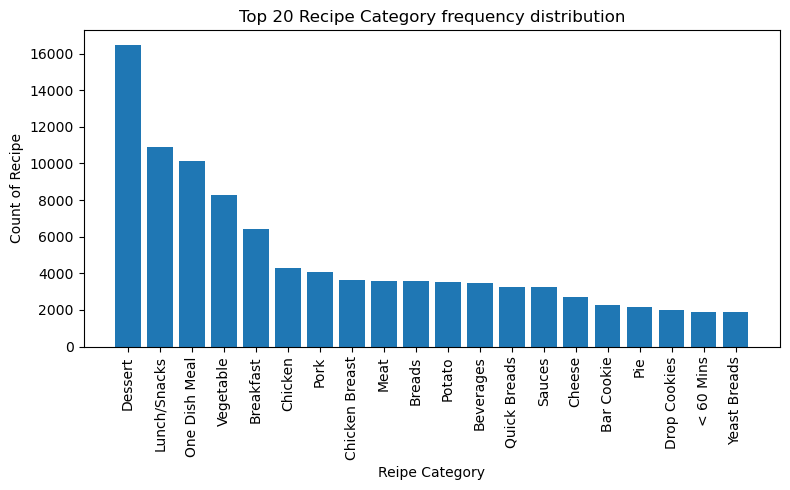

In [14]:
plt.figure(figsize = (8,5))

X = df_recipe['RecipeCategory'].value_counts().head(20).index
y = df_recipe['RecipeCategory'].value_counts().head(20).values

plt.bar(X, y, label = y)

plt.title('Top 20 Recipe Category frequency distribution')
plt.xlabel('Reipe Category')
plt.ylabel('Count of Recipe')
plt.xticks(rotation = 90)

plt.tight_layout()
plt.show()

The largest recipe category is dessert accounting for approximately 11% of all recipes in our dataset. In addition bread, quick breads, sauce, cheese, bar cookie, drop cookies, and yeast breads are also included in the top 20 recipe categories. 8 out of 20 recipe categories are not a staple meal that most people have in a day (dinner and lunch). This may lead to less suggestion in our end output for our project and something we need to keep in mind in the future.

## Nutritional Info
Columns for nutrional info include: 
- Calories - measured in grams
- FatContent - measured in grams
- SaturatedFatContent - measured in grams
- CholesterolContent - measured in milligrams
- SodiumContent - measured in milligrams
- CarbohydrateContent - measured in grams
- FiberContent - measured in grams
- SugarContent - measured in grams
- ProteinContent - measured in grams



In [15]:
df_recipe[['Calories' , 'FatContent', 'SaturatedFatContent', 'CholesterolContent', 'SodiumContent',
              'CarbohydrateContent', 'FiberContent', 'SugarContent', 'ProteinContent']].describe()

,Calories,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent
count,147793.000000,147793.000000,147793.000000,147793.000000,147793.000000,147793.000000,147793.000000,147793.000000,147793.000000
mean,481.634862,24.246471,9.454479,86.784257,731.678325,48.787961,3.792430,21.440969,17.991578
std,1390.729774,54.798739,20.804063,170.173273,3182.488543,298.901054,7.878353,245.487844,30.590587
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,177.700000,5.800000,1.500000,5.400000,134.200000,12.900000,0.800000,2.500000,3.700000
50%,317.300000,13.700000,4.700000,44.600000,366.100000,28.100000,2.200000,6.300000,9.700000
75%,522.300000,27.200000,10.700000,108.700000,798.900000,50.300000,4.500000,17.100000,26.100000
max,434360.200000,11169.400000,2079.000000,11823.800000,704129.600000,108294.600000,1748.600000,90682.300000,3276.200000


All nutritional variables have a right-tailed distribution with a very high max value skewing the mean right versus the median. Most of the mean and median values of the recipe do fall within a normal intake for a meal to a regular person. 

<AxesSubplot:xlabel='Calories'>

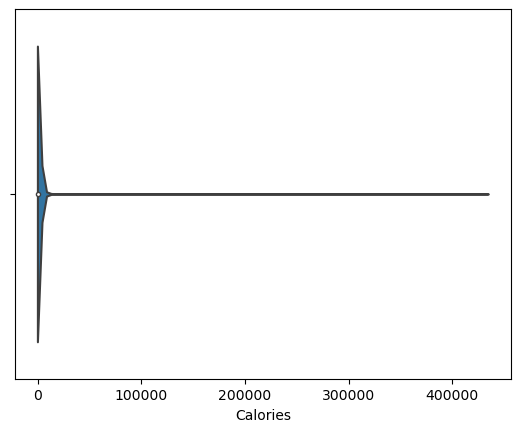

In [16]:
sns.violinplot(x=df_recipe['Calories'])

Outliers are causing the plot to be very skewed and no information can be gained from the graph. We will adjust the graph by removing certain points past a standard deviation to provide a better glimpse of what is happening with each nutritional variable.

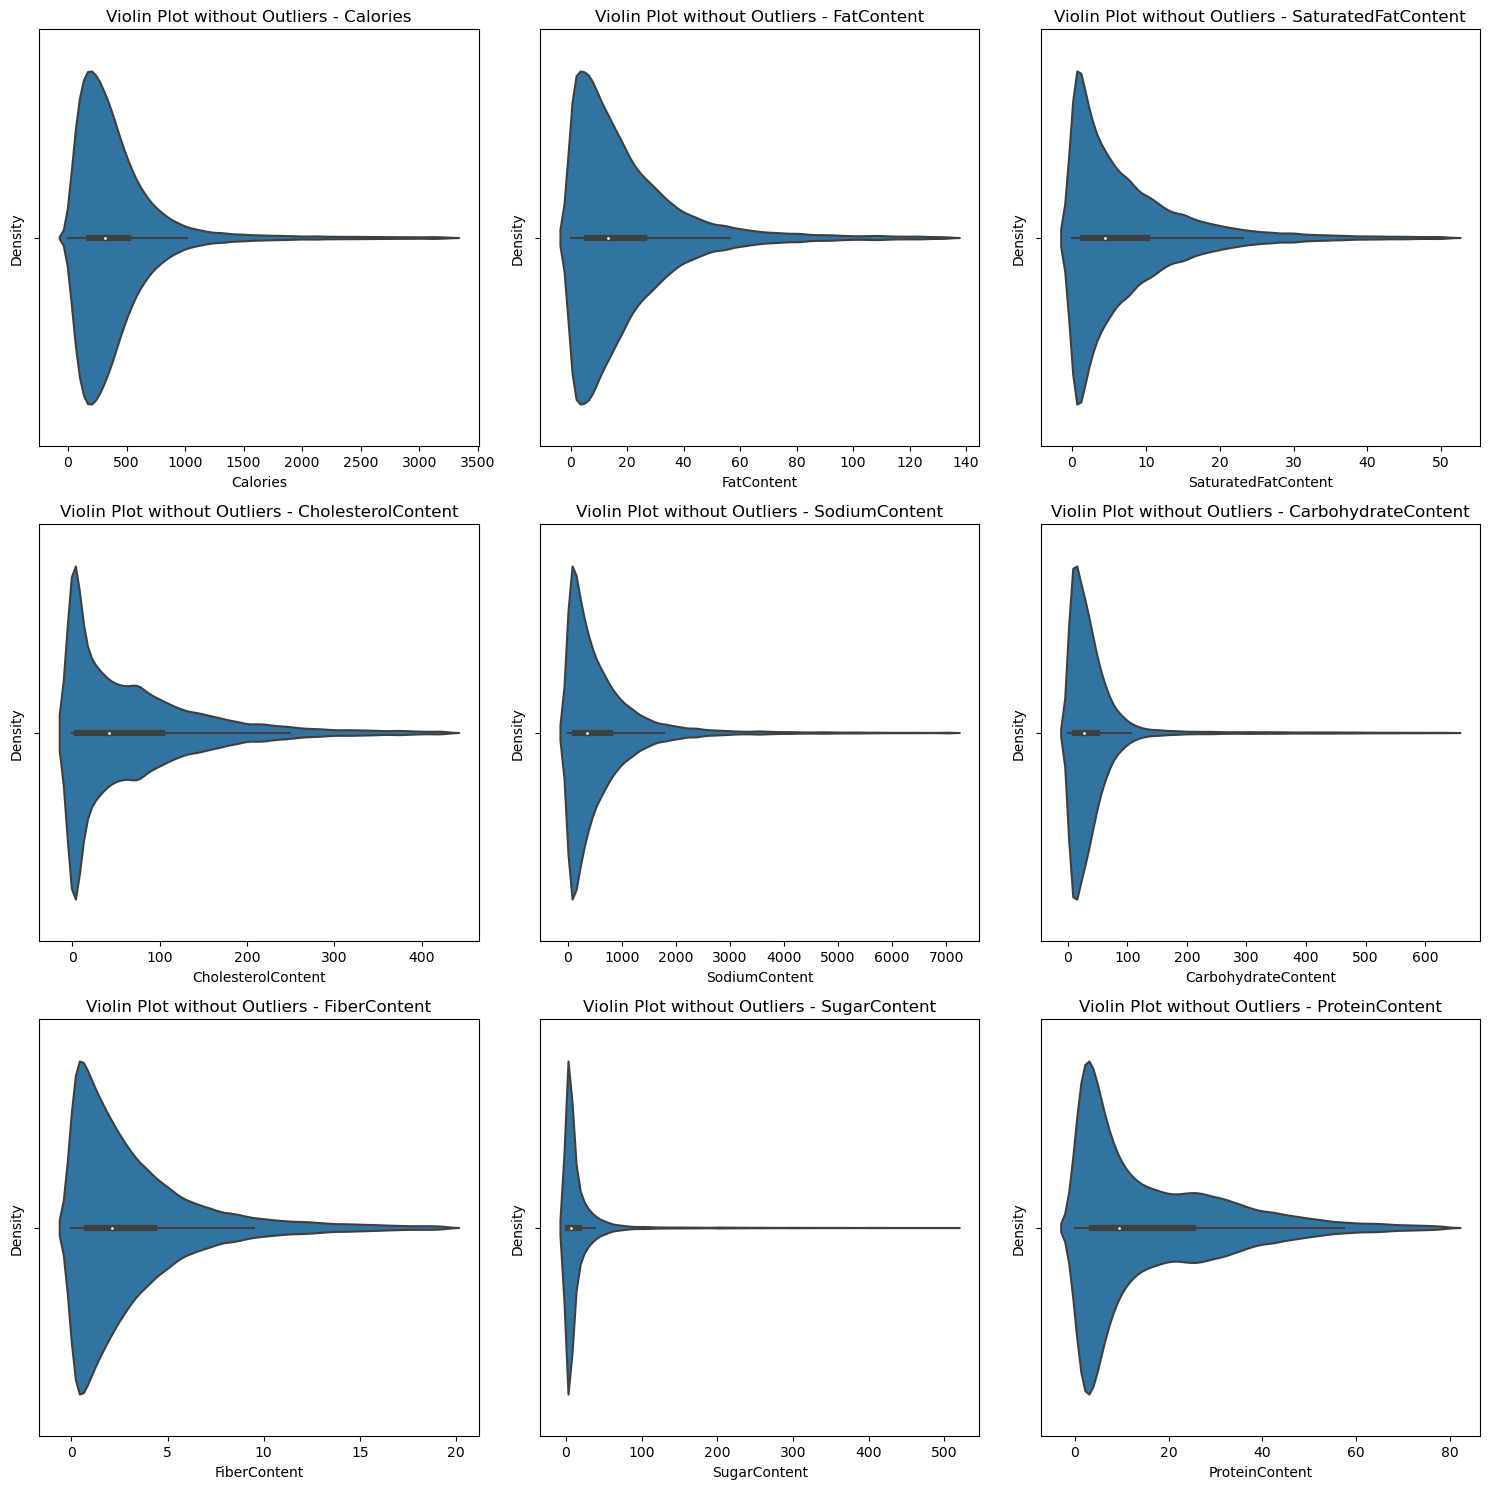

In [17]:
nutritional = ['Calories', 'FatContent', 'SaturatedFatContent', 'CholesterolContent', 'SodiumContent',
               'CarbohydrateContent', 'FiberContent', 'SugarContent', 'ProteinContent']

# Create a 3x3 grid of subplots
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
axes = axes.flatten()  # Flatten the 2D array of subplots for indexing

for i, attribute in enumerate(nutritional):
    ax = axes[i]  # Get the current axis

    z_scores = np.abs(stats.zscore(df_recipe[attribute]))
    #Defining the number of standard deviations
    threshold = 2
    outliers = df_recipe[z_scores > threshold]
    df_no_outliers = df_recipe[z_scores <= threshold]

    sns.violinplot(data=df_no_outliers, x=attribute, ax=ax)
    ax.set_title(f'Violin Plot without Outliers - {attribute}')
    ax.set_xlabel(attribute)
    ax.set_ylabel('Density')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

Even after eliminating data points beyond a range of 2 standard deviations, all nutritional variables continue to exhibit a right-tailed distribution. While this pattern persists, the presence of outliers is limited. The majority of nutritional variables remain clustered around their respective means.

This may not affect our end goal output for the list of recipes that are produced as most recipes nutritional info is fairly regular. If our outcome does spit out reicpes with outliers, we may need to re-adjust and remove any outliers. 

## Number of minutes, steps, and ingredients

In [18]:
#Describing the variables
with pd.option_context('display.float_format', '{:.15f}'.format):
    description = df_recipe[['minutes', 'n_steps', 'n_ingredients']].describe()
    print(description)

                      minutes                n_steps          n_ingredients
count  147793.000000000000000 147793.000000000000000 147793.000000000000000
mean      118.791816933142982      9.814091330441903      9.087784942453297
std      3094.503302065802927      5.932537703975273      3.709911737437495
min         0.000000000000000      1.000000000000000      1.000000000000000
25%        20.000000000000000      6.000000000000000      6.000000000000000
50%        40.000000000000000      9.000000000000000      9.000000000000000
75%        65.000000000000000     12.000000000000000     11.000000000000000
max   1051200.000000000000000    108.000000000000000     39.000000000000000


ALl three variables have a large max value. We can check how many recipes fall within the interquartile range (IQR) to get a sense of the distribution of recipes by minutes, steps, and ingredients.

In [19]:
#Setting the lower and upper bound for the IQR

targets = ['minutes', 'n_steps', 'n_ingredients']

for i in targets:
    Q1 = np.percentile(df_recipe[i], 25)
    Q3 = np.percentile(df_recipe[i], 75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    values_within_iqr = len([value for value in df_recipe[i] if lower_bound <= value <= upper_bound])
    percentage_within_iqr = (values_within_iqr / df_recipe[i].count()) * 100
    print(f"Percentage of values within IQR for {i}: {percentage_within_iqr:.2f}%")

Percentage of values within IQR for minutes: 89.70%
Percentage of values within IQR for n_steps: 95.73%
Percentage of values within IQR for n_ingredients: 98.38%


Most of our recipes are falling within a normal range which leads to the case that we may not need to remove any of the recipes. We do need to keep in mind of this fact when we model and determine whether these outliers will affect our results. 

### Classify the minutes into time intervals
4 options
- less than 30 minutes
- less than an hour
- less than 2 hours
- more than 2 hours

In [20]:
# Function to classify minutes into four groups
def classify_minutes(minutes_list):
    less_than_30 = 0
    less_than_60 = 0
    less_than_120 = 0
    more_than_120 = 0

    for minutes in minutes_list:
        if minutes < 30:
            less_than_30 += 1
        elif minutes < 60:
            less_than_60 += 1
        elif minutes < 120:
            less_than_120 += 1
        else:
            more_than_120 += 1

    return [less_than_30, less_than_60, less_than_120, more_than_120]

In [21]:
# Classify the minutes
classification = classify_minutes(df_recipe['minutes'])

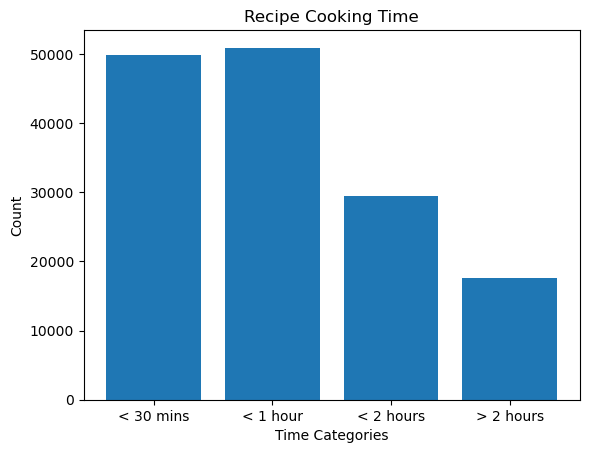

In [22]:
# Categories
categories = ['< 30 mins', '< 1 hour', '< 2 hours', '> 2 hours']

# Create a bar graph
plt.bar(categories, classification)
plt.xlabel('Time Categories')
plt.ylabel('Count')
plt.title('Recipe Cooking Time')
plt.show()

Most recipes are falling under an hour or less. This is a good sign as we would like to have a dataset of recipes that have practical cooking times when recommending to users.

## Year, month, day of the week

In [23]:
#Min and Max year
print(f"Minimum year: {df_recipe['year'].min()}")
print(f"Maximum year: {df_recipe['year'].max()}")
print(f"Number of years spanning: {df_recipe['year'].max() - df_recipe['year'].min()}")

Minimum year: 1999
Maximum year: 2018
Number of years spanning: 19


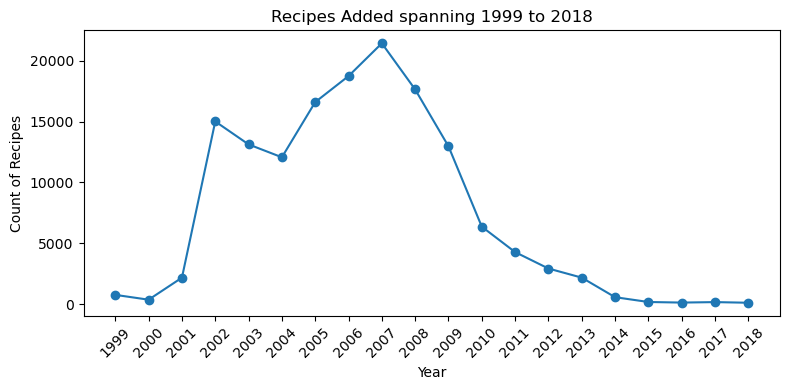

In [24]:
#Plotting frequency count of recipe of the years
plt.figure(figsize = (8, 4))

years_count = df_recipe['year'].value_counts().sort_index()

    
plt.plot(years_count.index, years_count.values, marker = 'o')

plt.title('Recipes Added spanning 1999 to 2018')
plt.xlabel('Year')
plt.ylabel('Count of Recipes')
plt.xticks(years_count.index.astype(int), rotation=45)


plt.tight_layout()
plt.show()

Majority of the recipes spanned from 2002 to 2009 with the highest number of recipes uploaded in 2007. This is something to consider in the future state of our project and may need to include more recent recipes. The lack of recipes in the more recent years may be due to the fact that Food.com is being used less. We will need to compensate this in the future by adding recipes in more recent years.

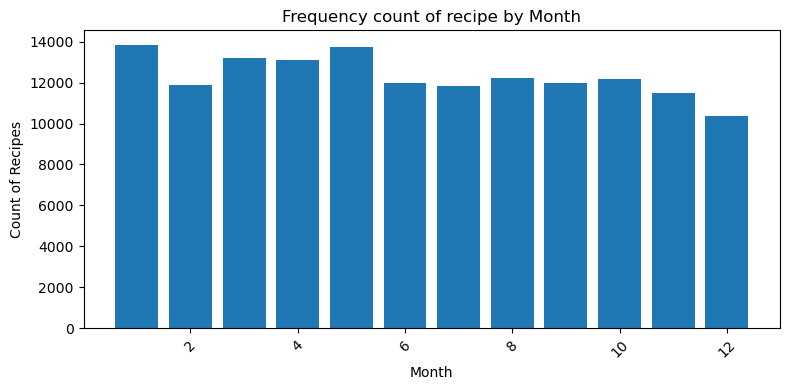

In [25]:
#Plotting frequency count of recipe of the years
plt.figure(figsize = (8, 4))

X = df_recipe['month'].value_counts().index
y = df_recipe['month'].value_counts().values
    
plt.bar(X,y)

plt.title('Frequency count of recipe by Month')
plt.xlabel('Month')
plt.ylabel('Count of Recipes')
plt.xticks(rotation = 45)

plt.tight_layout()
plt.show()

Most recipes are uploaded in the period January to May. This may follow the logic the during summer months and in December people are on holidays and spend less time uploading recipes. This also may fall in line with why there are so many dessert recipes in our dataset.

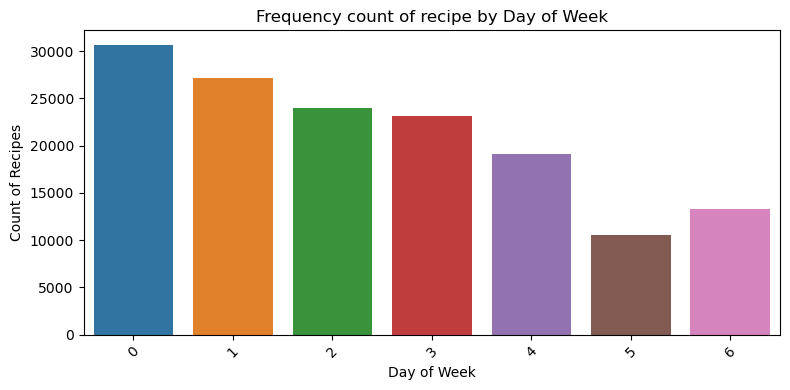

In [26]:
#Plotting frequency count of recipe of the years
plt.figure(figsize = (8, 4))

X = df_recipe['day_of_week'].value_counts().index
y = df_recipe['day_of_week'].value_counts().values
    
sns.barplot(x = X, y = y)

plt.title('Frequency count of recipe by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Count of Recipes')
plt.xticks(rotation = 45)

plt.tight_layout()
plt.show()

The 0 to 6 scale refers to 0 being Sunday and 6 being Saturday and all numbers in between go in chronological order of the week. Seems like most people upload recipes on Sunday and early in the week. This makes sense as the week goes on people get more tired and less likely to upload. In addition, Friday and Saturday most people may be doing some social.

## Reviews

In [27]:
#Highest review count recipes - top 5
top_recipe_reviews = df_recipe.groupby('RecipeName')['ReviewCount'].sum().sort_values(ascending=False).head(5)
type(top_recipe_reviews)

pandas.core.series.Series

In [28]:
top_recipes_reviewcount = df_recipe.merge(top_recipe_reviews, on='RecipeName')

top_recipes = top_recipes_reviewcount[['RecipeName', 'RecipeCategory', 'ReviewCount_x', 'AggregatedRating', 'ingredients']]
top_recipes.rename(columns = {'ReviewCount_x':'ReviewCount'}, inplace = True)
top_recipes.sort_values(by='ReviewCount', ascending=False)

,RecipeName,RecipeCategory,ReviewCount,AggregatedRating,ingredients
3,No Peek Stew,Stew,2892.0,4.31,"['stew meat', 'potato', 'carrot', 'onion', 'gr..."
0,Sherry's Apple and Brown Sugar Coffee Cake,Breads,2182.0,4.22,"['apple', 'flour', 'brown sugar', 'butter', 'w..."
1,Challah Recipe for the Kitchen Aide,Yeast Breads,1614.0,4.28,"['water', 'dry yeast', 'sugar', 'egg', 'oil', ..."
4,Crab-Artichoke Casserole,Crab,1584.0,4.22,"['small shell pasta', 'butter', 'green onions'..."
2,Easy and Cheesy Hungarian Noodle Bake,< 60 Mins,1492.0,4.54,"['fine egg noodles', 'onion', 'garlic', 'butte..."


Highest review count recipes also have fairly high rating. Most of the items with exception of the breads could be items recommended for a lunch or dinner recipe. 

In [29]:
#Total reviews
print(f"Total reviews in our dataset: {df_review['RecipeId'].count()}")

Total reviews in our dataset: 765139


We have a fairly large number of reviews in our dataset. This will be very helpufl when we run our collaborative models as more review interactions will help generate better predictive results

In [ ]:
round(df_review['Rating'].value_counts(normalize = True) * 100,2)

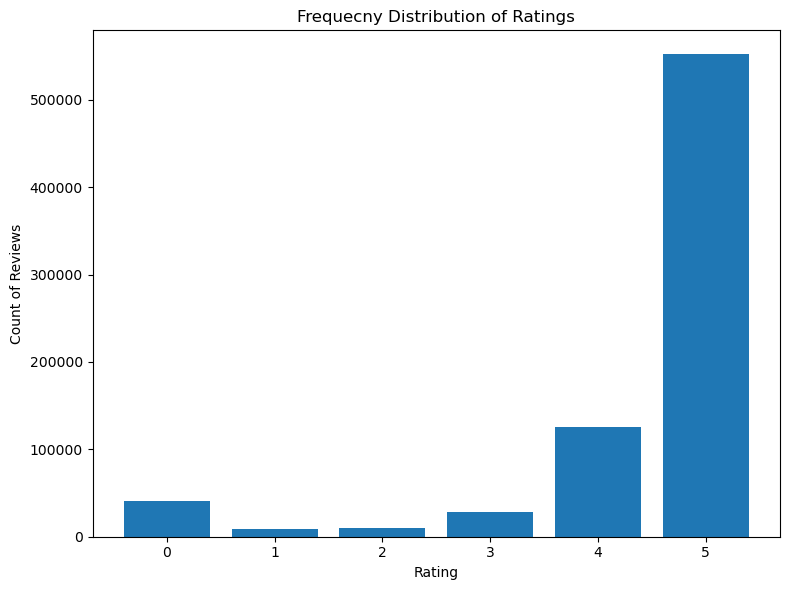

In [31]:
#Rating distribution
plt.figure(figsize = (8,6))

X = df_review['Rating'].value_counts().index
y = df_review['Rating'].value_counts().values

plt.bar(X, y)

plt.title("Frequecny Distribution of Ratings")
plt.xlabel('Rating')
plt.ylabel('Count of Reviews')

plt.tight_layout()
plt.show()

Approximatley 72% of all recipes received a rating 5 and almost 90% recieved a 4 or above. This may skew our models in recommending more high rating recipes and no lower rating recipes even though the recipes may fit user's preference. We need to take note that even though certain recipe have a 5 star rating, it might not mean that it would be the best recipe for specific users as ratings is subjective matter.

In [32]:
df_review.head(5)

,User,RecipeId,Rating
0,2008,992,5
1,2156,148,0
2,2046,517,5
3,2625,471,3
4,2312,780,5


In [33]:
#Import review data set with dates
df_review2 = pd.read_csv('reviews_data_EDA.csv')

In [34]:
df_review2.head(5)

,Unnamed: 0,User,RecipeId,Rating,DateSubmitted
0,0,2008,992,5,2000-01-25
1,1,1634,4384,4,2001-10-17
2,2,2046,4523,2,2000-02-25
3,3,1773,7435,5,2000-03-13
4,4,2085,44,5,2000-03-28


In [35]:
df_review2.drop(columns = 'Unnamed: 0', inplace = True)

In [36]:
df_review2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1410790 entries, 0 to 1410789
Data columns (total 4 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   User           1410790 non-null  int64 
 1   RecipeId       1410790 non-null  int64 
 2   Rating         1410790 non-null  int64 
 3   DateSubmitted  1410790 non-null  object
dtypes: int64(3), object(1)
memory usage: 43.1+ MB


In [37]:
#Change DateSubmitted format from string to date format
df_review2['DateSubmitted'] = pd.to_datetime(df_review2['DateSubmitted'])

In [38]:
df_review2['year'] = df_review2['DateSubmitted'].dt.year

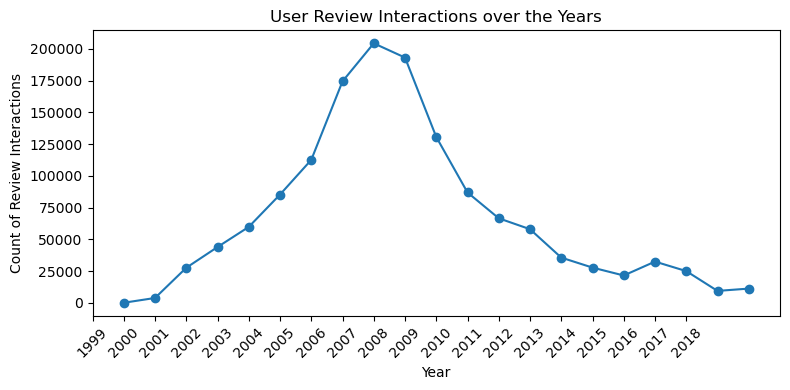

In [39]:
#Plot user review interactions over the years
plt.figure(figsize = (8, 4))

years_review_count = df_review2['year'].value_counts().sort_index()
plt.plot(years_review_count.index, years_review_count.values, marker='o')

plt.title("User Review Interactions over the Years")
plt.xlabel("Year")
plt.ylabel("Count of Review Interactions")
plt.xticks(years_count.index.astype(int), rotation=45)

plt.tight_layout()
plt.show()

We can see that most recipes are added around 2006-2008. This is something we need to keep in mind for our future state and help develop a more diverse recipe database.

## Serving size and Servings
Serving size is measued in grams and servings are number of servings recipe outputs.

In [40]:
df_recipe[['serving_size', 'servings']].describe()

,serving_size,servings
count,147793.000000,147793.000000
mean,375.216343,6.486092
std,2380.003588,9.225559
min,0.000000,1.000000
25%,125.000000,3.000000
50%,222.000000,4.000000
75%,380.000000,8.000000
max,876698.000000,1296.000000


Extreme right outliers for both serving_size and servings causing the mean to be higher than the median.

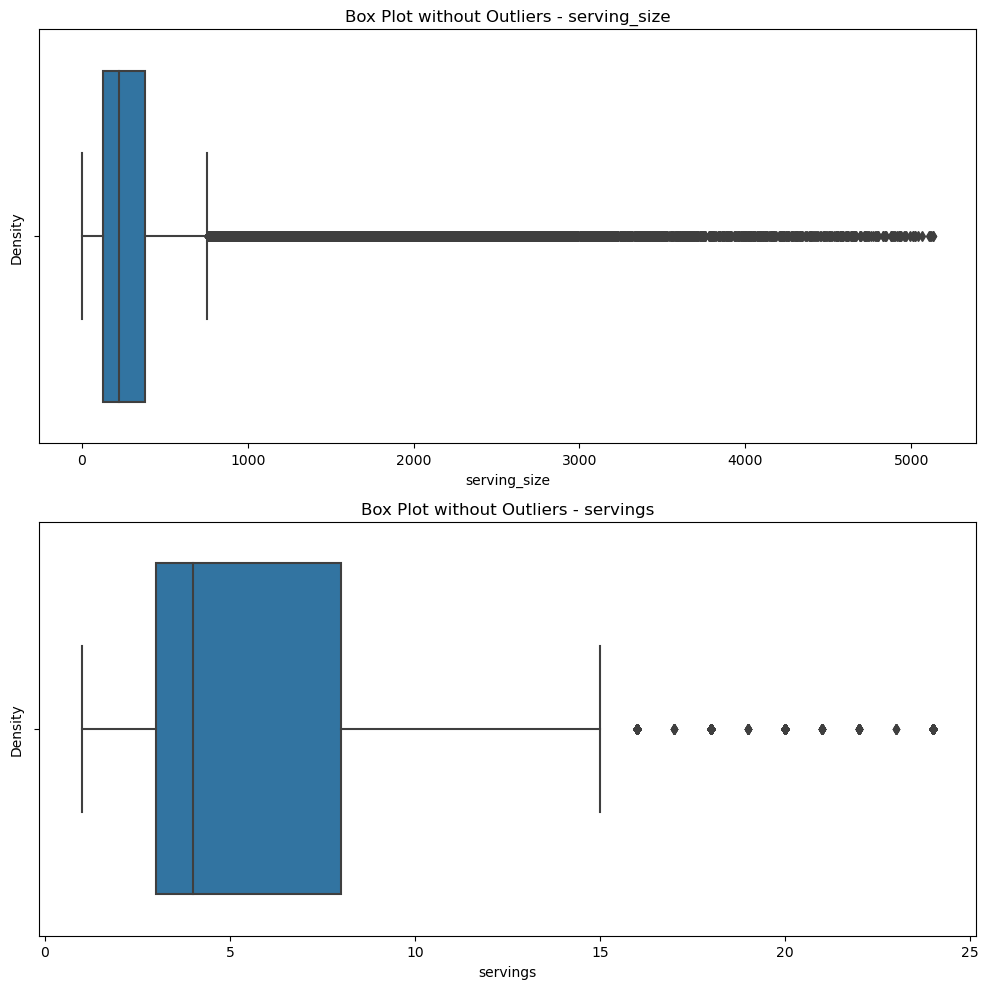

In [41]:
serving = ['serving_size', 'servings']

# Create a 3x3 grid of subplots
fig, axes = plt.subplots(2, 1, figsize=(10, 10))
axes = axes.flatten()  # Flatten the 2D array of subplots for indexing

for i, attribute in enumerate(serving):
    ax = axes[i]  # Get the current axis

    z_scores = np.abs(stats.zscore(df_recipe[attribute]))
    #Defining the number of standard deviations
    threshold = 2
    outliers = df_recipe[z_scores > threshold]
    df_no_outliers = df_recipe[z_scores <= threshold]

    sns.boxplot(data=df_no_outliers, x=attribute, ax=ax)
    ax.set_title(f'Box Plot without Outliers - {attribute}')
    ax.set_xlabel(attribute)
    ax.set_ylabel('Density')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

In [42]:
servingsize_input = 2000

percent_over1000 = df_recipe[df_recipe['serving_size'] > servingsize_input]['serving_size'].count()/df_recipe['serving_size'].count()
print(f'Recipes over {servingsize_input} grams in serving sizes account for {round(percent_over1000 * 100, 2)} percent')

Recipes over 2000 grams in serving sizes account for 1.7 percent


In [43]:
df_recipe[df_recipe['serving_size'] > 2000][['RecipeName', 'RecipeCategory', 'Calories' , 'serving_size',\
                                             'servings']].head(10)
                                             

,RecipeName,RecipeCategory,Calories,serving_size,servings
19,Amish Friendship Bread and Starter,Quick Breads,615.9,3058,1
63,Winter Pear Butter,Pears,2059.7,2193,1
72,Feijoada (Brazilian Bean Soup) II,Pork,293.8,3552,1
82,Dolmades with Yogurt-Mint Sauce,White Rice,89.0,2045,1
97,Killer Kahlua,Beverages,1751.0,2662,1
161,Apple or Crabapple Jelly,Jellies,205.8,10253,1
190,Four Treasure Chicken Soup,Clear Soup,831.9,2332,1
206,Country Style Zucchini Soup,Vegetable,194.2,2979,1
213,Elderflower Champagne,Beverages,2681.8,4640,1
218,Curried Crab in Endive Spears,Crab,24.8,2091,1


Serving size has a large number of extreme outliers than servings. There are only 1.7% recipes that have greater than 2000 grams per serving, but as we can see from the recipes with greater than 2000 grams per serving, most of these only have 1 serving. These dishes are probably one pot that can serve many. This may be difficult for our end goal to help determine how much these recipes can serve and the process of meal planning.

# Conclusion
Overall, many of the categories have extreme ouliers, but most of these variables have majority of the data points centered arond the mean. I don't think we need to take the extra steps of removing them as there are very few and removing extra data may affect the predictive ability of our model. We have attained may insights on where our data is strong and weak and what we need to look out for when we start modelling. We also have future steps we would like to take in our future state project.